<a href="https://colab.research.google.com/github/ngocdominh/portfolio-project/blob/main/DA_2103_Final_Project_Do_Minh_Ngoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is executed using the [IT Salary Survey for EU region (2018-2020)](https://www.kaggle.com/parulpandey/2020-it-salary-survey-for-eu-region) dataset.

***OBJECTIVE***

* Most cities of survey participants
* Salary of participants in different cities, different seniority level, with different technologies, etc.
* Correlation among age, experience, and salary
* Influence of coronavirus outbreak (in 2020)

# I. Importing libraries and data

In [ ]:
!pip install -U scipy

     |████████████████████████████████| 38.1 MB 1.4 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
sal_19 = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/DA 2103 - Final Project/IT Salary Survey EU 2019.csv')
sal_20 = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/DA 2103 - Final Project/IT Salary Survey EU 2020.csv')

In [ ]:
sal_20.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000,75000.0,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,80000.0,NaN,82000.0,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000,100000.0,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,54000.0,NaN,NaN,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,NaN,62000.0,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [ ]:
sal_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                                                                   1243 non-null   object 
 3   City                                                                                                                     1253 non-null   o

# II. Cleaning data & EDA

## 2.1. Create new dataframes with some specific columns, convert data type, proceed null values

In [ ]:
# Rename columns

sal_20.rename({'Position ': 'Position',
               'Your main technology / programming language': 'Main technology',
               'Yearly brutto salary (without bonus and stocks) in EUR': 'Yearly brutto salary',
               'Have you lost your job due to the coronavirus outbreak?': 'Lost job due to cororavirus',
               'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week': 'Working hours remaining weekly'
               }, axis=1, inplace=True)

In [ ]:
# Remove unnecessary leading and trailing spaces

sal_20 = sal_20.replace(r"^ +| +$", r"", regex=True)

In [ ]:
sal_20.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Main technology',
       'Other technologies/programming languages you use often',
       'Yearly brutto salary', 'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Lost job due to cororavirus', 'Working hours remaining weekly',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR'],
      dtype='object')

In [ ]:
# Create a new dataframe

df20 = sal_20[['Age', 'Gender', 'City', 'Position', 'Total years of experience', 'Seniority level', 'Main technology',
        'Yearly brutto salary', 'Number of vacation days', 'Main language at work', 'Working hours remaining weekly']]
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             1226 non-null   float64
 1   Gender                          1243 non-null   object 
 2   City                            1253 non-null   object 
 3   Position                        1247 non-null   object 
 4   Total years of experience       1237 non-null   object 
 5   Seniority level                 1241 non-null   object 
 6   Main technology                 1126 non-null   object 
 7   Yearly brutto salary            1253 non-null   float64
 8   Number of vacation days         1185 non-null   object 
 9   Main language at work           1237 non-null   object 
 10  Working hours remaining weekly  373 non-null    float64
dtypes: float64(3), object(8)
memory usage: 107.8+ KB


In [ ]:
df20.describe()

,Age,Yearly brutto salary,Working hours remaining weekly
count,1226.000000,1.253000e+03,373.000000
mean,32.509788,8.027904e+07,12.967828
std,5.663804,2.825061e+09,15.275174
min,20.000000,1.000100e+04,0.000000
25%,29.000000,5.880000e+04,0.000000
50%,32.000000,7.000000e+04,0.000000
75%,35.000000,8.000000e+04,30.000000
max,69.000000,1.000000e+11,40.000000


In [ ]:
df20['Age'].mean()

32.50978792822186

In [ ]:
df20['Age'] = df20['Age'].fillna(32)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df20['Total years of experience'] = df20['Total years of experience'].replace('1,5', '1.5')
df20['Total years of experience'] = df20['Total years of experience'].replace('1 (as QA Engineer) / 11 in total', '11')
df20['Total years of experience'] = df20['Total years of experience'].replace('2,5', '2.5')
df20['Total years of experience'] = df20['Total years of experience'].replace('15, thereof 8 as CTO', '15')
df20['Total years of experience'] = df20['Total years of experience'].replace('6 (not as a data scientist, but as a lab scientist)', '6')
df20['Total years of experience'] = df20['Total years of experience'].replace('383', '3')
df20['Total years of experience'] = df20['Total years of experience'].replace('less than year', '1')
df20['Total years of experience'] = df20['Total years of experience'].astype('float')
df20['Total years of experience'] = df20['Total years of experience'].fillna(df20['Total years of experience'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df20['Number of vacation days'].value_counts()

30                                              488
28                                              233
27                                              102
25                                               91
26                                               71
24                                               67
29                                               24
20                                               13
21                                               10
32                                                8
31                                                8
22                                                8
unlimited                                         5
35                                                5
36                                                5
40                                                4
0                                                 4
23                                                4
45                                                3
Unlimited   

In [ ]:
df20[df20['Number of vacation days'] == '365']

,Age,Gender,City,Position,Total years of experience,Seniority level,Main technology,Yearly brutto salary,Number of vacation days,Main language at work,Working hours remaining weekly
235,32.0,Male,Berlin,Engineering Manager,9.0,Lead,NaN,95000.0,365,English,NaN


In [ ]:
df20['Number of vacation days'] = df20['Number of vacation days'].replace('unlimited', '30')
df20['Number of vacation days'] = df20['Number of vacation days'].replace('Unlimited', '30')
df20['Number of vacation days'] = df20['Number of vacation days'].replace('23+', '23')
df20['Number of vacation days'] = df20['Number of vacation days'].replace('24 labour days', '24')
df20['Number of vacation days'] = df20['Number of vacation days'].replace('(no idea)', '30')
df20['Number of vacation days'] = df20['Number of vacation days'].replace('~25', '25')
df20['Number of vacation days'] = df20['Number of vacation days'].replace('365', '30')
df20['Number of vacation days'] = df20['Number of vacation days'].replace('30 in contract (but theoretically unlimited)', '30')
df20['Number of vacation days'] = df20['Number of vacation days'].astype('float')
df20['Number of vacation days'] = df20['Number of vacation days'].fillna(30)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             1253 non-null   float64
 1   Gender                          1243 non-null   object 
 2   City                            1253 non-null   object 
 3   Position                        1247 non-null   object 
 4   Total years of experience       1253 non-null   float64
 5   Seniority level                 1241 non-null   object 
 6   Main technology                 1126 non-null   object 
 7   Yearly brutto salary            1253 non-null   float64
 8   Number of vacation days         1253 non-null   float64
 9   Main language at work           1237 non-null   object 
 10  Working hours remaining weekly  373 non-null    float64
dtypes: float64(5), object(6)
memory usage: 107.8+ KB


Remove outliers

In [ ]:
q1 = df20['Yearly brutto salary'].quantile(0.25)
q3 = df20['Yearly brutto salary'].quantile(0.75)
iqr = q3 - q1

upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

In [ ]:
new_df20 = df20[(df20['Yearly brutto salary'] > lower_limit) & (df20['Yearly brutto salary'] < upper_limit)].reset_index()

print('The number of outliers removed is:', df20.shape[0] - new_df20.shape[0])

The number of outliers removed is: 82


In [ ]:
new_df20['Gender'] = new_df20['Gender'].fillna('NA')
new_df20['Gender'].unique()

array(['Male', 'Female', 'NA'], dtype=object)

In [ ]:
# Let's assume that the normal number of working hours of each person is 40 hours/week

new_df20['Working hours remaining weekly'] = new_df20['Working hours remaining weekly'].fillna(40)

In [ ]:
new_df20.head()

,index,Age,Gender,City,Position,Total years of experience,Seniority level,Main technology,Yearly brutto salary,Number of vacation days,Main language at work,Working hours remaining weekly
0,0,26.0,Male,Munich,Software Engineer,5.0,Senior,TypeScript,80000.0,30.0,English,40.0
1,1,26.0,Male,Berlin,Backend Developer,7.0,Senior,Ruby,80000.0,28.0,English,40.0
2,3,28.0,Male,Berlin,Frontend Developer,4.0,Junior,Javascript,54000.0,24.0,English,40.0
3,4,37.0,Male,Berlin,Backend Developer,17.0,Senior,C# .NET,62000.0,29.0,English,40.0
4,5,32.0,Male,Berlin,DevOps,5.0,Senior,"AWS, GCP, Python,K8s",76000.0,30.0,English,40.0


In [ ]:
new_df20['Main technology'] = new_df20['Main technology'].fillna('None')
new_df20['Main technology']

0                 TypeScript
1                       Ruby
2                 Javascript
3                    C# .NET
4       AWS, GCP, Python,K8s
                ...         
1166                    Java
1167       consumer analysis
1168                     PHP
1169              JavaScript
1170                    yaml
Name: Main technology, Length: 1171, dtype: object

In [ ]:
# In 'Main technology' column, some people fill in MORE THAN ONE expertises. The following codes will take THE ONLY FIRST technology of each row, make a new 'Main technology' column to replace the original one

tech_list = new_df20['Main technology'].str.split(', |/|,').tolist()
tech_list_1 = list(tech_list)
main_tech = [item[0] for item in tech_list_1]
df_main_tech = pd.DataFrame(main_tech)
df_main_tech

,0
0,TypeScript
1,Ruby
2,Javascript
3,C# .NET
4,AWS
...,...
1166,Java
1167,consumer analysis
1168,PHP
1169,JavaScript


In [ ]:
new_df20 = new_df20.drop(['index', 'Main technology'], axis=1)

In [ ]:
new_df20 = pd.concat([new_df20, df_main_tech], axis=1)

In [ ]:
new_df20.rename({0:'Main technology'}, axis=1, inplace=True)
new_df20['Main technology'] = new_df20['Main technology'].str.capitalize()

In [ ]:
new_df20 = new_df20.replace(r"^ +| +$", r"", regex=True)

In [ ]:
new_df20['Main technology'] = new_df20['Main technology'].replace('Php', 'PHP')
new_df20['Main technology'] = new_df20['Main technology'].replace('Pythin', 'Python')
new_df20['Main technology'] = new_df20['Main technology'].replace('Pyrhon', 'Python')

In [ ]:
new_df20['Main technology'].value_counts()

Python                 207
Java                   202
None                   124
Javascript              89
PHP                     69
                      ... 
Computer networking      1
Salesforce               1
Objective-c              1
Erlang                   1
Consumer analysis        1
Name: Main technology, Length: 122, dtype: int64

## 2.2. Exploratory Data Analysis

Exploring some demographic information

In [ ]:
sns.set_style('whitegrid')

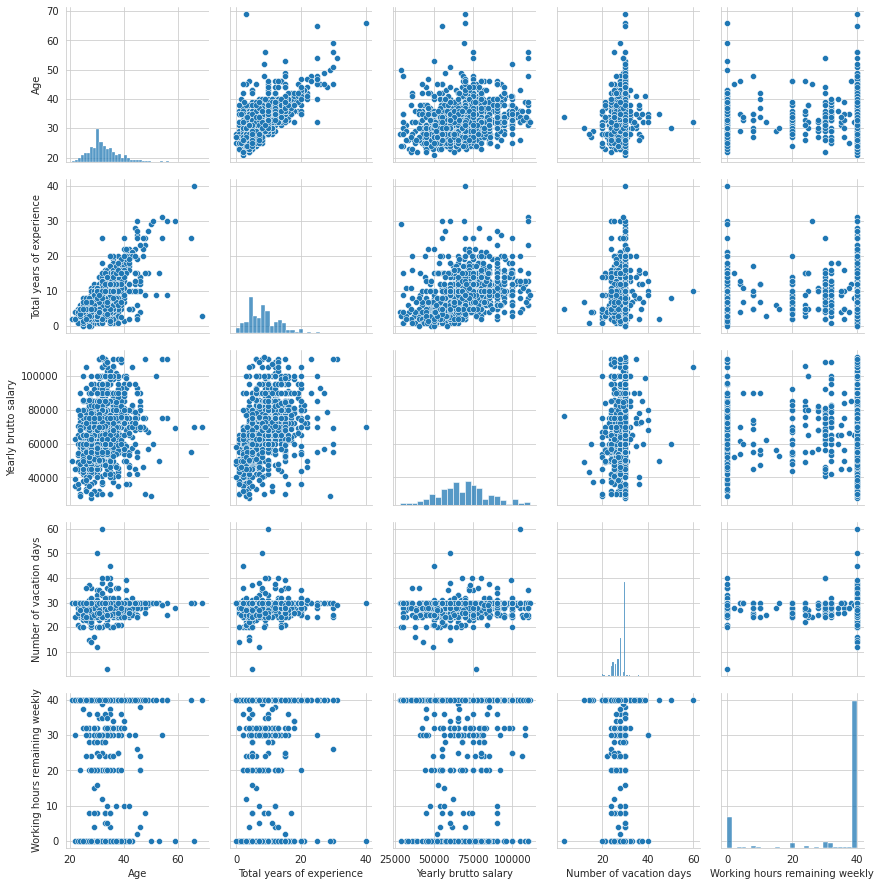

In [ ]:
sns.pairplot(new_df20)

In [ ]:
new_df20['Age'].describe()

count    1171.000000
mean       32.574722
std         5.588313
min        21.000000
25%        29.000000
50%        32.000000
75%        35.000000
max        69.000000
Name: Age, dtype: float64

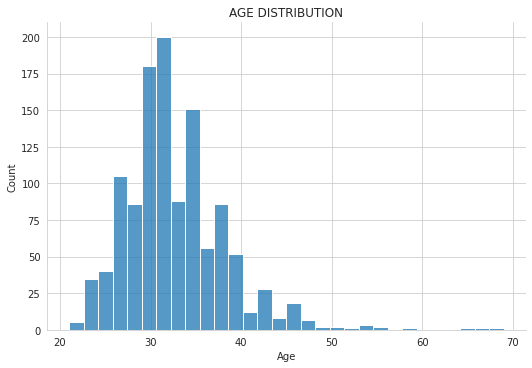

In [ ]:
sns.displot(data=new_df20, x='Age', bins=30, aspect=1.5).set(title='AGE DISTRIBUTION')

# Most of participants are between 25 and 40 years old

[Text(0.5, 1.0, 'COUNT OF GENDERS')]

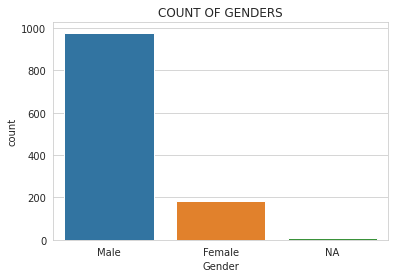

In [ ]:
sns.countplot(data=new_df20, x='Gender').set(title='COUNT OF GENDERS')

# The ratio of female to male participants is approximately 1/5

In [ ]:
import plotly.express as px

In [ ]:
px.histogram(new_df20, 'City', color='Gender').update_xaxes(categoryorder='total descending')

# The majority of participants come from Germany

Exploring work-relevant information

In [ ]:
new_df20.head()

,Age,Gender,City,Position,Total years of experience,Seniority level,Yearly brutto salary,Number of vacation days,Main language at work,Working hours remaining weekly,Main technology
0,26.0,Male,Munich,Software Engineer,5.0,Senior,80000.0,30.0,English,40.0,Typescript
1,26.0,Male,Berlin,Backend Developer,7.0,Senior,80000.0,28.0,English,40.0,Ruby
2,28.0,Male,Berlin,Frontend Developer,4.0,Junior,54000.0,24.0,English,40.0,Javascript
3,37.0,Male,Berlin,Backend Developer,17.0,Senior,62000.0,29.0,English,40.0,C# .net
4,32.0,Male,Berlin,DevOps,5.0,Senior,76000.0,30.0,English,40.0,Aws


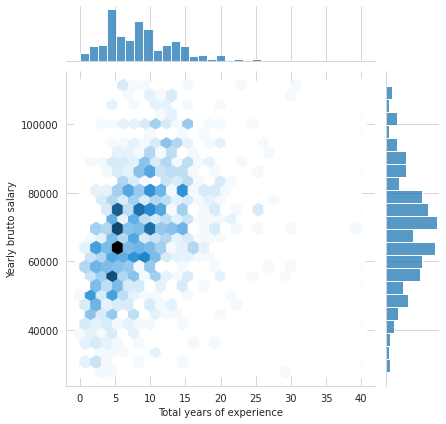

In [ ]:
sns.jointplot(data=new_df20, x='Total years of experience', y='Yearly brutto salary', kind='hex')

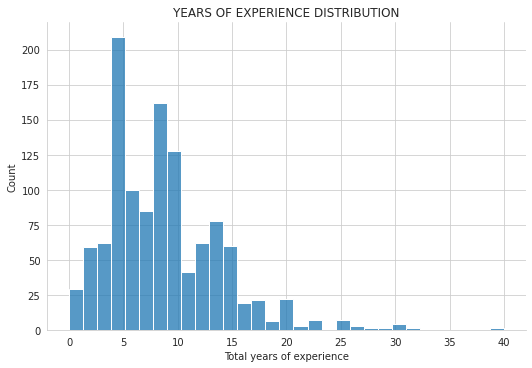

In [ ]:
sns.displot(new_df20['Total years of experience'], aspect=1.5).set(title='YEARS OF EXPERIENCE DISTRIBUTION')

# Most of participants have from 5 to 15 years of experience

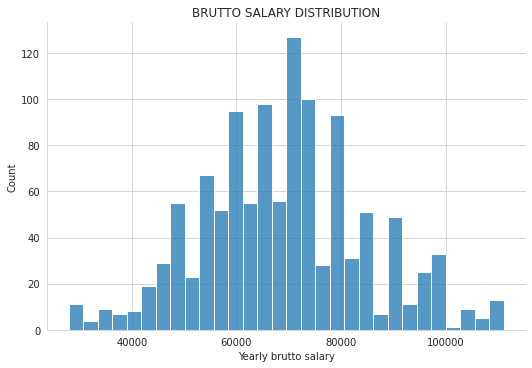

In [ ]:
sns.displot(new_df20['Yearly brutto salary'], bins=30, aspect=1.5).set(title='BRUTTO SALARY DISTRIBUTION')

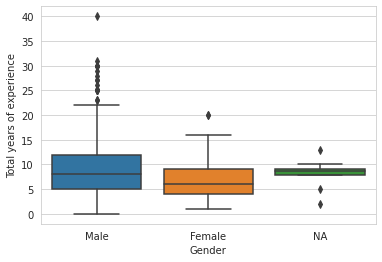

In [ ]:
sns.boxplot(data=new_df20, x='Gender', y='Total years of experience')

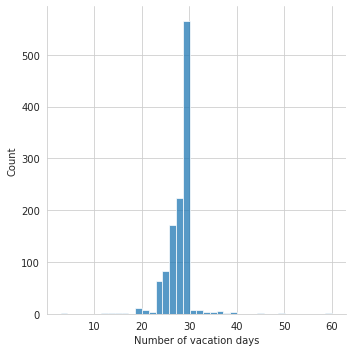

In [ ]:
sns.displot(new_df20['Number of vacation days'], bins=40)

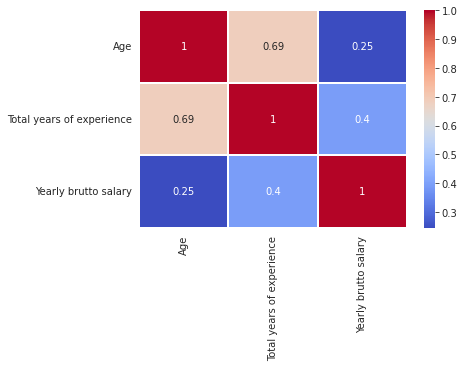

In [ ]:
sns.heatmap(new_df20[['Age', 'Total years of experience', 'Yearly brutto salary']].corr(), annot=True, lw=1, cmap='coolwarm')

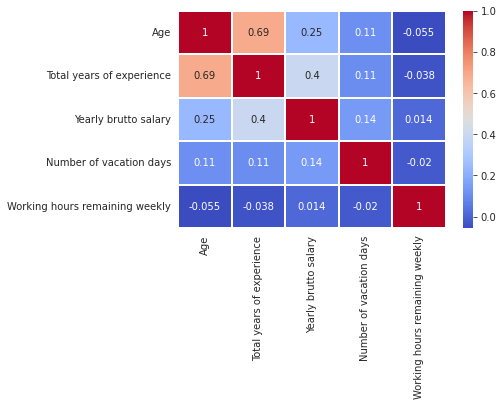

In [ ]:
sns.heatmap(new_df20[['Age', 'Total years of experience', 'Yearly brutto salary', 'Number of vacation days', 'Working hours remaining weekly']].corr(), annot=True, lw=1, cmap='coolwarm')

# Correlation coefficient between Age and Total years of experience is relatively high, which is understandable
# Correlation coefficient between Age and Yearly brutto salary, however, is quite small

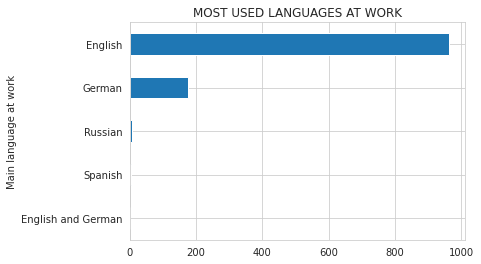

In [ ]:
new_df20['Main language at work'].groupby(new_df20['Main language at work']).count().sort_values(ascending=False).head().plot.barh(title='MOST USED LANGUAGES AT WORK').invert_yaxis()

# Main languages at work of participants are English and German, which completely makes sense because most of them work in Germany

In [ ]:
new_df20[['Total years of experience', 'Yearly brutto salary']].groupby(new_df20['Gender']).mean().sort_values(by='Yearly brutto salary', ascending=False)

,Total years of experience,Yearly brutto salary
Gender,,
NA,8.125344,71201.375000
Male,9.173627,70807.562505
Female,6.452706,59910.027027


In [ ]:
new_df20['City'].groupby(new_df20['City']).count().sort_values(ascending=False).head()

City
Berlin       650
Munich       220
Frankfurt     41
Hamburg       37
Stuttgart     33
Name: City, dtype: int64

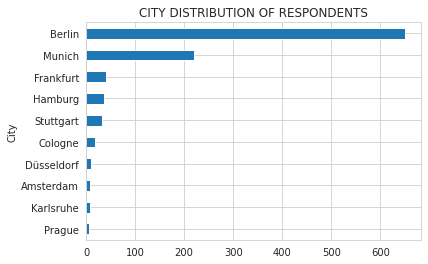

In [ ]:
new_df20['City'].groupby(new_df20['City']).count().sort_values(ascending=False).head(10).plot.barh(title='CITY DISTRIBUTION OF RESPONDENTS').invert_yaxis()

In [ ]:
ber_mun = new_df20[new_df20['City'].isin(['Berlin', 'Munich'])]
ber_mun.describe()

,Age,Total years of experience,Yearly brutto salary,Number of vacation days,Working hours remaining weekly
count,870.000000,870.000000,870.000000,870.000000,870.000000
mean,32.566667,8.933055,71076.791954,28.274713,32.333333
std,5.350503,5.036636,14683.505211,3.031735,14.507223
min,22.000000,0.000000,28800.000000,3.000000,0.000000
25%,29.000000,5.000000,60000.000000,27.000000,32.000000
50%,32.000000,8.000000,70000.000000,28.000000,40.000000
75%,35.000000,12.000000,80000.000000,30.000000,40.000000
max,66.000000,40.000000,111111.000000,60.000000,40.000000


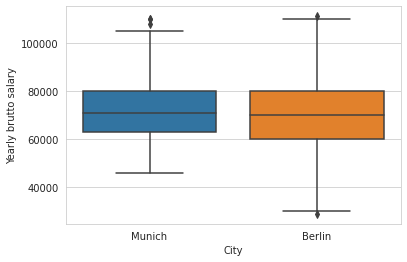

In [ ]:
sns.boxplot(data=ber_mun, x='City', y='Yearly brutto salary')

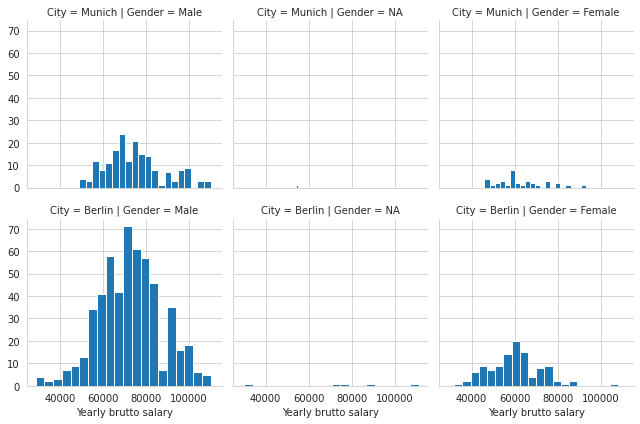

In [ ]:
g = sns.FacetGrid(ber_mun, row='City', col='Gender')
g.map(plt.hist, 'Yearly brutto salary', bins=20)

In [ ]:
new_df20['Seniority level'].groupby(new_df20['Seniority level']).count().sort_values(ascending=False).head()

Seniority level
Senior    547
Middle    349
Lead      146
Junior     70
Head       35
Name: Seniority level, dtype: int64

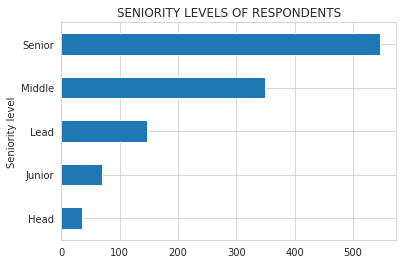

In [ ]:
new_df20['Seniority level'].groupby(new_df20['Seniority level']).count().sort_values(ascending=False).head().plot.barh(title='SENIORITY LEVELS OF RESPONDENTS').invert_yaxis()

In [ ]:
most_5_levels = new_df20[new_df20['Seniority level'].isin(['Senior', 'Middle', 'Lead', 'Junior', 'Head'])]
most_5_levels[['Seniority level', 'Total years of experience', 'Yearly brutto salary', 'Working hours remaining weekly']].groupby(most_5_levels['Seniority level']).mean().sort_values(by='Yearly brutto salary', ascending=False)

,Total years of experience,Yearly brutto salary,Working hours remaining weekly
Seniority level,,,
Head,12.314286,88128.571429,34.485714
Lead,12.015425,83534.041096,29.931507
Senior,10.103757,72216.879342,31.931444
Middle,6.038686,59832.575931,32.522923
Junior,2.754286,49950.000000,34.028571


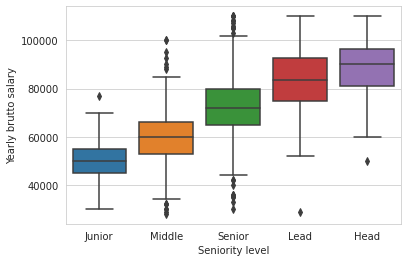

In [ ]:
sns.boxplot(data=most_5_levels, x='Seniority level', y='Yearly brutto salary', order=['Junior', 'Middle', 'Senior', 'Lead', 'Head'])

In [ ]:
most_5_levels[['Seniority level', 'Gender', 'Total years of experience', 'Yearly brutto salary']].groupby(['Gender', 'Seniority level']).mean().sort_values(by=['Gender', 'Total years of experience', 'Seniority level'], ascending=False)

Total years of experience  Yearly brutto salary
Gender Seniority level                                                 
NA     Senior                           11.500000          68500.000000
       Lead                              8.750687          90000.000000
       Middle                            3.500000          65750.000000
Male   Head                             12.470588          88514.705882
       Lead                             12.202216          84436.544118
       Senior                           10.364485          72867.624230
       Middle                            6.056426          61032.739300
       Junior                            2.836170          49468.085106
Female Lead                              9.555556          69177.777778
       Senior                            7.866391          66881.034483
       Head                              7.000000          75000.000000
       Middle                            6.044444          56273.944444
       Junior                            2.586957          50934.782609

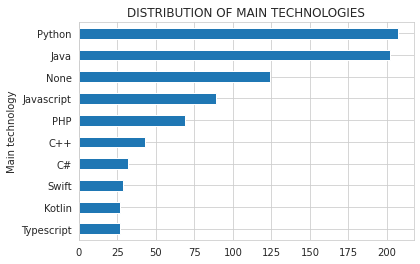

In [ ]:
new_df20['Main technology'].groupby(new_df20['Main technology']).count().sort_values(ascending=False).head(10).plot.barh(title='DISTRIBUTION OF MAIN TECHNOLOGIES').invert_yaxis()

In [ ]:
most_5_tech = new_df20[new_df20['Main technology'].isin(['Python', 'Java', 'Javascript', 'PHP', 'C++'])]

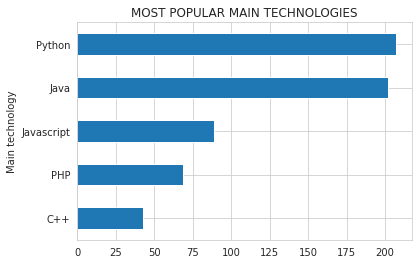

In [ ]:
most_5_tech['Main technology'].groupby(most_5_tech['Main technology']).count().sort_values(ascending=False).head().plot.barh(title='MOST POPULAR MAIN TECHNOLOGIES').invert_yaxis()

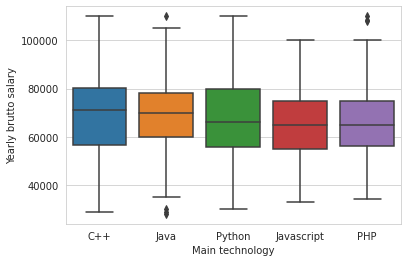

In [ ]:
sns.boxplot(data=most_5_tech, x='Main technology', y='Yearly brutto salary', order=['C++', 'Java', 'Python', 'Javascript', 'PHP'])

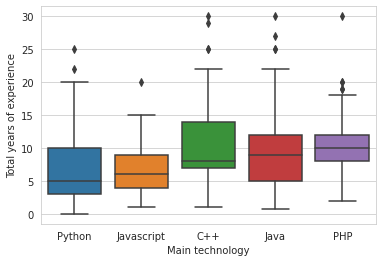

In [ ]:
sns.boxplot(data=most_5_tech, x='Main technology', y='Total years of experience', order=['Python', 'Javascript', 'C++', 'Java', 'PHP'])

The influence of coronavirus outbreak

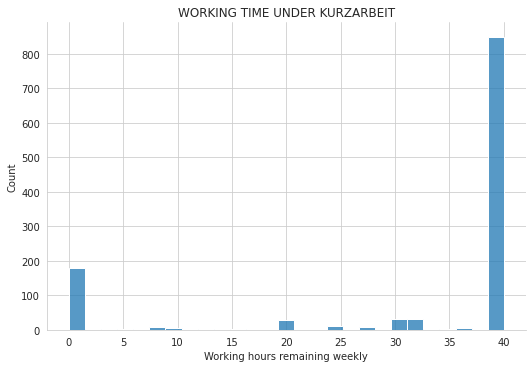

In [ ]:
sns.displot(new_df20['Working hours remaining weekly'], aspect=1.5).set(title='WORKING TIME UNDER KURZARBEIT')

In [ ]:
new_df20[new_df20['Working hours remaining weekly'] == 40].shape[0] / new_df20['Working hours remaining weekly'].shape[0] * 100

# More than 70% of employees in this survey are not affected by the coronavirus outbreak as their total number of weekly working hours still stays the same.

72.41673783091375

In [ ]:
new_df20[new_df20['Working hours remaining weekly'] <= 10].shape[0] / new_df20['Working hours remaining weekly'].shape[0] * 100

# On the other hand, nearly 20% of employees were significantly affected by the pandemic as they just worked 10 hours per week or less. Some of them had to find a new job.

16.82322801024765

In [ ]:
new_df20[['Total years of experience', 'Working hours remaining weekly']].corr()

,Total years of experience,Working hours remaining weekly
Total years of experience,1.000000,-0.037881
Working hours remaining weekly,-0.037881,1.000000


# III. Comparing some interesting features by hypothesis testings

## 3.1. Between 2019 and 2020

In [ ]:
sal_19.head()

,Zeitstempel,Age,Gender,City,Seniority level,Position (without seniority),Years of experience,Your main technology / programming language,Yearly brutto salary (without bonus and stocks),Yearly bonus,Yearly stocks,Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country,Yearly bonus one year ago. Only answer if staying in same country,Yearly stocks one year ago. Only answer if staying in same country,Number of vacation days,Number of home office days per month,Main language at work,Company name,Company size,Company type,Сontract duration,Company business sector,0
0,02.12.2019 11:18:26,33.0,Male,Berlin,Senior,Fullstack Developer,13,PHP,64000.0,1000.0,NaN,58000.0,1000.0,NaN,29.0,4.0,English,NaN,50-100,Startup,unlimited,Tourism,NaN
1,02.12.2019 11:18:35,29.0,Male,Berlin,Middle,Backend Developer,3,Python,55000.0,NaN,NaN,55000.0,NaN,NaN,22.0,4.0,English,NaN,10-50,Product,unlimited,Scientific Activities,NaN
2,02.12.2019 11:18:56,32.0,Male,Berlin,Middle,Mobile Developer,4,Kotlin,70000.0,NaN,NaN,55000.0,NaN,NaN,27.0,NaN,English,NaN,1000+,Startup,unlimited,NaN,NaN
3,02.12.2019 11:19:08,30.0,Male,Berlin,Senior,Backend Developer,6,PHP,63000.0,NaN,NaN,NaN,NaN,NaN,24.0,NaN,English,Auto1,100-1000,Product,unlimited,Transport,NaN
4,02.12.2019 11:19:37,32.0,Male,Berlin,Senior,Embedded Developer,10,C/C++,66000.0,NaN,NaN,56000.0,NaN,NaN,30.0,0.0,English,Luxoft,50-100,Product,unlimited,Automotive,NaN


In [ ]:
sal_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 23 columns):
 #   Column                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                --------------  -----  
 0   Zeitstempel                                                                                           991 non-null    object 
 1   Age                                                                                                   991 non-null    float64
 2   Gender                                                                                                991 non-null    object 
 3   City                                                                                                  991 non-null    object 
 4   Seniority level                                                                                       97

In [ ]:
sal_19['Age'].mean()

32.370332996972756

In [ ]:
sal_19['Age'] = sal_19['Age'].fillna(32)

In [ ]:
df19 = sal_19[['Age', 'Gender', 'City', 'Seniority level', 'Position (without seniority)', 'Years of experience', 'Your main technology / programming language', 'Yearly brutto salary (without bonus and stocks)', 'Main language at work']]

In [ ]:
df19.replace(r"^ +| +$", r"", regex=True)

,Age,Gender,City,Seniority level,Position (without seniority),Years of experience,Your main technology / programming language,Yearly brutto salary (without bonus and stocks),Main language at work
0,33.0,Male,Berlin,Senior,Fullstack Developer,13,PHP,64000.0,English
1,29.0,Male,Berlin,Middle,Backend Developer,3,Python,55000.0,English
2,32.0,Male,Berlin,Middle,Mobile Developer,4,Kotlin,70000.0,English
3,30.0,Male,Berlin,Senior,Backend Developer,6,PHP,63000.0,English
4,32.0,Male,Berlin,Senior,Embedded Developer,10,C/C++,66000.0,English
...,...,...,...,...,...,...,...,...,...
986,30.0,Male,Amsterdam,Senior,Backend Developer,10,Python,71000.0,English
987,28.0,Male,Amsterdam,Senior,Security Engineer,7,Not Relevant,72000.0,English
988,42.0,Male,Munich,Senior,Manager,9,Not Relevant,68000.0,English
989,33.0,Male,Berlin,Senior,Software Architect,15,Javascript / Typescript,100000.0,English


In [ ]:
df19 = df19.rename({'Position (without seniority)': 'Position',
                    'Your main technology / programming language': 'Main technology',
                    'Yearly brutto salary (without bonus and stocks)': 'Yearly brutto salary'}, axis=1)

In [ ]:
q1_19 = df19['Yearly brutto salary'].quantile(0.25)
q3_19 = df19['Yearly brutto salary'].quantile(0.75)
iqr_19 = q3_19 - q1_19

upper_limit_19 = q3_19 + 1.5 * iqr_19
lower_limit_19 = q1_19 - 1.5 * iqr_19

In [ ]:
new_df19 = df19[(df19['Yearly brutto salary'] < upper_limit_19) & (df19['Yearly brutto salary'] > lower_limit_19)]

print('The number of outliers removed is:', df19.shape[0] - new_df19.shape[0])

The number of outliers removed is: 94


In [ ]:
new_df19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 897 entries, 0 to 990
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    897 non-null    float64
 1   Gender                 897 non-null    object 
 2   City                   897 non-null    object 
 3   Seniority level        883 non-null    object 
 4   Position               896 non-null    object 
 5   Years of experience    897 non-null    int64  
 6   Main technology        884 non-null    object 
 7   Yearly brutto salary   897 non-null    float64
 8   Main language at work  894 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 70.1+ KB


In [ ]:
from scipy.stats import ttest_ind

In [ ]:
sal_male_19 = new_df19[new_df19['Gender'] == 'Male']['Yearly brutto salary']
sal_female_19 = new_df19[new_df19['Gender'] == 'Female']['Yearly brutto salary']

sal_male_20 = new_df20[new_df20['Gender'] == 'Male']['Yearly brutto salary']
sal_female_20 = new_df20[new_df20['Gender'] == 'Female']['Yearly brutto salary']

In [ ]:
# H0: sal_male_19 = sal_female_19
# Ha: sal_male_19 > sal_female_19

ttest_ind(sal_male_19, sal_female_19, equal_var=False, alternative='greater')

# p-value < 0.05, reject H0 (i.e. sal_male_19 is significantly greater than sal_female_19)

Ttest_indResult(statistic=8.055897332517587, pvalue=2.971291621181796e-14)

In [ ]:
ttest_ind(new_df20['Yearly brutto salary'], new_df19['Yearly brutto salary'], alternative='two-sided')

Ttest_indResult(statistic=0.3812226463137931, pvalue=0.7030772450288582)

In [ ]:
# H0: sal_male_19 = sal_male_20
# Ha: sal_male_19 <> sal_male_20

ttest_ind(sal_male_19, sal_male_20, equal_var=False, alternative='two-sided')

# p-value > 0.05, fail to reject H0 (i.e. the difference between sal_male_19 and sal_male_20 is not statistically significant)

Ttest_indResult(statistic=-0.3897512352625631, pvalue=0.6967707289273295)

In [ ]:
# H0: sal_female_19 = sal_female_20
# Ha: sal_female_19 <> sal_female_20

ttest_ind(sal_female_19, sal_female_20, equal_var=False, alternative='two-sided')

# p-value > 0.05, fail to reject H0 (i.e. the difference between sal_female_19 and sal_female_20 is not statistically significant)

Ttest_indResult(statistic=0.08398695259117742, pvalue=0.9331243986630062)

In [ ]:
ber_19 = new_df19[new_df19['City'] == 'Berlin']['Yearly brutto salary']
ber_20 = new_df20[new_df20['City'] == 'Berlin']['Yearly brutto salary']

mun_19 = new_df19[new_df19['City'] == 'Munich']['Yearly brutto salary']
mun_20 = new_df20[new_df20['City'] == 'Munich']['Yearly brutto salary']

In [ ]:
ttest_ind(ber_19, ber_20, equal_var=False, alternative='less')

Ttest_indResult(statistic=-0.7943152733838049, pvalue=0.2136140900710543)

In [ ]:
ttest_ind(mun_19, mun_20, equal_var=False, alternative='greater')

Ttest_indResult(statistic=-1.448487285714475, pvalue=0.9258914432157012)

## 3.2. Among the different technologies (2020)

In [ ]:
exp_python = most_5_tech[most_5_tech['Main technology'] == 'Python']['Total years of experience']
exp_cplus2 = most_5_tech[most_5_tech['Main technology'] == 'C++']['Total years of experience']
exp_java = most_5_tech[most_5_tech['Main technology'] == 'Java']['Total years of experience']

sal_python = most_5_tech[most_5_tech['Main technology'] == 'Python']['Yearly brutto salary']
sal_cplus2 = most_5_tech[most_5_tech['Main technology'] == 'C++']['Yearly brutto salary']
sal_java = most_5_tech[most_5_tech['Main technology'] == 'Java']['Yearly brutto salary']

In [ ]:
from scipy.stats import f_oneway

In [ ]:
f_oneway(sal_python, sal_cplus2, sal_java)

F_onewayResult(statistic=0.2881688947439776, pvalue=0.7497735093330564)

In [ ]:
f_oneway(exp_python, exp_cplus2, exp_java)

F_onewayResult(statistic=19.269242285824024, pvalue=9.360624352926254e-09)

In [ ]:
# H0: sal_python = sal_cplus2
# Ha: sal_python <> sal_cplus2

ttest_ind(sal_python, sal_cplus2, equal_var=False, alternative='two-sided')

Ttest_indResult(statistic=-0.6349998625989036, pvalue=0.5280445386055574)

In [ ]:
# H0: exp_python = exp_cplus2
# Ha: exp_python < exp_cplus2

ttest_ind(exp_python, exp_cplus2, equal_var=False, alternative='less')

Ttest_indResult(statistic=-3.9000559125414305, pvalue=0.00014374493031240872)

In [ ]:
# H0: sal_python = sal_java
# Ha: sal_python <> sal_java

ttest_ind(sal_python, sal_java, equal_var=False, alternative='two-sided')

Ttest_indResult(statistic=-0.3503962972282538, pvalue=0.726223925825083)

In [ ]:
# H0: exp_python = exp_java
# Ha: exp_python < exp_java

ttest_ind(exp_python, exp_java, equal_var=False, alternative='less')

Ttest_indResult(statistic=-5.166268422021613, pvalue=1.8882547861883987e-07)

# IV. Conclusions/Recommendations

* The survey was **focused on German employees**, so it didn’t give us an overall picture of the IT sector in the EU. Berlin and Munich are the most distributed cities
* It looks like **IT sector was barely influenced by the coronavirus** pandemic
* If you want to **make more money** in relatively **less time**, you can **consider Python as your expertise** rather than other technologies